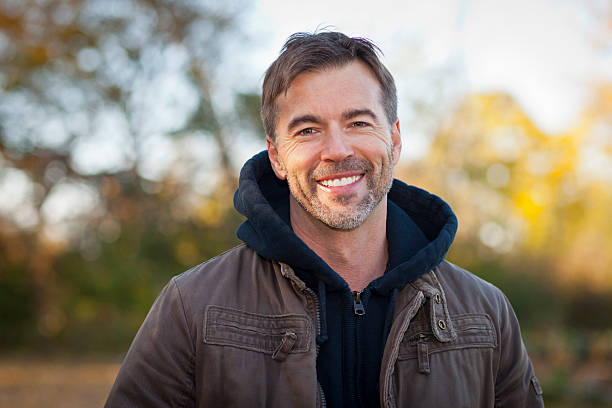

In [1]:
#WORKING CODE
from ipywidgets import widgets, HBox, GridspecLayout, Layout
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime
import random
import time
import os
from os import listdir

print("Thank you for being willing to participate in my experiment. If, for any reason, you would like to stop the")
print("experiment you may just leave the computer as it is and leave the room that the test is being taken in. If you end "
)
print("the experiment your data will not be used and will immediately be destroyed. To begin the experiment press the ")
print("'Enter' button when you are ready. You will first be asked your gender, this is the only personal data that will ")
print("be collected about you during this experiment. You will then be shown an images and you will be asked to select"
)
print("either 'attractive' or 'unattractive'. There are quite a few images so feel free to use your gut instinct to")
print("determine if the image is 'attractive' or 'unattractive'.")
print("If you have any further questions feel free to ask them at any point during the experiment.")
enter3 = widgets.Button(
    description = "Enter",
    disabled = False)
enter3_out = widgets.Output()
gender = widgets.Dropdown(
    options = ['','Female','Male','Nonbinary'],
    description = "Gender:")
enter = widgets.Button(
    description='Enter',
    disabled=False,)
def enter3_onclick(a):
    clear_output()
    first_show = HBox([gender,enter])
    display(first_show)
enter3.on_click(enter3_onclick)
display(enter3)

#reading last file created
files = os.listdir('./RESPONSES')
paths = [os.path.join('./RESPONSES/', basename) for basename in files]
pastfile = open(max(paths, key=os.path.getctime), 'r')
pastset = pastfile.readline(5)
pastfile.close()

#creating new file
filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
fp = open('RESPONSES/'+filename1 + '.txt', 'w')
images_dict = {}
counter = 1
#button grid
grid2 = GridspecLayout(5, 6)
for i in range(5):
    for j in range(6):
        grid2[i, j] = widgets.ToggleButton(
        value=False,
        description='Attractive',
        disabled=False,
    )
output = widgets.Output()

#choosing set
if pastset == 'Set B':
    images = os.listdir('./ALL images/Set A')
    def path(img):
        img = './ALL images/Set A/'+img
        return img
    fp.write('Set A')
    fp.write('\n')
else:
    images = os.listdir('./ALL images/Set B')
    def path(img):
        img = './ALL images/Set B/'+img
        return img
    fp.write('Set B')
    fp.write('\n')
for image in images:
    if 'jpg' in image:
        images_dict[counter] = path(image)
        counter += 1

sequences = [] #order of images
sequence = [] #A and N
#creating image sequence
image_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
sequences.append([random.sample(image_list,k = 30)]) #change len(images)
while len(sequences) < 5  and len(sequences) >=1:
    image_choice = []
    image_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    image_choice.append(random.sample(image_list,k = 30)) #change len(images)
    if sequences[-1][0][-1] != image_choice[0][0]: 
        sequences.append(image_choice)
    elif sequences[-1][0][-1] == image_choice[0][0]:
        continue
    if len(sequences) == 5:
        break
j = [0] #counter
g = [0] #counter

attractive = widgets.Button(
    description='Attractive',
    disabled=False,
)

attractive_out = widgets.Output()
def attractive_onclick(a):
    if j[-1] == 5 and g[-1] == 0: #change
        clear_output()
        sequence.append("A")
        print("You have now finished a large portion of the experiment.")
        print("Next you will be shown 30 images that you were not shown earlier and you will be asked to select the 15 most")
        print("'attractive' out the 30.")
        print("Use the buttons at the bottom of the images to determine who is 'attractive'.")
        print("When you are finished with this part you may press the 'submit' button and all of your results will be saved.")
        print("When you are ready to precede press the 'Enter' button on your screen. It may take a few seconds to load.")
        display(enter2)
    else:
        clear_output()
        sequence.append("A")
        img = Image.open(images_dict[sequences[j[-1]][0][g[-1]]]).convert('RGB')
        display(img)
        if g[-1] == 29:#change len(images)-1
            j.append(j[-1]+1)
            g.append(0)
        else:
            g.append(g[-1]+1)
        combined = HBox([attractive,unattractive])
        display(combined)
attractive.on_click(attractive_onclick)

unattractive = widgets.Button(
    description='Unattractive',
    disabled=False,
)

unattractive_out = widgets.Output()
def unattractive_onclick(a):
    if j[-1] == 5 and g[-1] == 0: #change
        clear_output()
        sequence.append("N")
        print("You have now finished a large portion of the experiment.")
        print("Next you will be shown 30 images that you were not shown earlier and you will be asked to select the 15 most")
        print("'attractive' out the 30.")
        print("Use the buttons at the botton of the images to determine who is 'attractive'.")
        print("When you are finished with this part you may press the 'submit' button and all of your results will be saved.")
        print("When you are ready to precede press the 'Enter' button on your screen. It may take a few seconds to load.")
        display(enter2)
    else:
        clear_output()
        sequence.append("N")
        img = Image.open(images_dict[sequences[j[-1]][0][g[-1]]]).convert('RGB')
        display(img)
        if g[-1] == 29:#change len(images)-1
            j.append(j[-1]+1)
            g.append(0)
        else:
            g.append(g[-1]+1)
        combined = HBox([attractive,unattractive])
        display(combined)
unattractive.on_click(unattractive_onclick)

enter_out = widgets.Output()
def enter_onclick(a):
    clear_output()
    fp.write(gender.label)
    fp.write('\n')
    display(Image.open(images_dict[sequences[j[-1]][0][g[-1]]]).convert('RGB'))
    if g[-1] == 29:#change len(images)-1
        j.append(j[-1]+1)
        g.append(0)
    else:
        g.append(g[-1]+1)
    combined = HBox([attractive,unattractive])
    display(combined)
    print(sequence)
enter.on_click(enter_onclick)

enter2 = widgets.Button(
    description = 'Enter',
    disabled = False,
)
enter2_out = widgets.Output()
def enter2_onclick(a):
    clear_output()
    if pastset == 'Set B': #set A was chosen last time
        def img_reshape(img):
            img = Image.open('./ALL images/Set B/'+img).convert('RGB')
            img = img.resize((450,300))
            img = np.asarray(img)
            return img
        images = os.listdir('./ALL images/Set B')
    else:
        def img_reshape(img):
            img = Image.open('./ALL images/Set A/'+img).convert('RGB')
            img = img.resize((450,300))
            img = np.asarray(img)
            return img
        images = os.listdir('./ALL images/Set A')

    img_arr = []
    for image in images:
        if 'jpg' in image:
            img_arr.append(img_reshape(image))

    from mpl_toolkits.axes_grid1 import ImageGrid

    fig = plt.figure(figsize=(20., 20.))
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(5, 6), 
                     axes_pad=0.1,  # pad between axes
                     )

    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
    plt.show()
    display(grid2)
    display(submit)
enter2.on_click(enter2_onclick)
submit = widgets.Button(
    description = 'Submit',
    disable = False,
)
submit_out = widgets.Output()
def submit_onclick(a):
    clear_output()
    fp.write(str(images_dict))
    fp.write('\n')
    fp.write(''.join(sequence))
    fp.write('\n')
    phrase = ''
    for j in range(5):
        for g in range(30): #have to change to len(images)
            phrase += str(sequences[j][0][g])
            phrase += " "
    fp.write(phrase)
    for g in range(5):
        fp.write('\n')
        for h in range(6):
            fp.write(str(grid2[g,h].value))
            fp.write(" ")
    fp.close()
    print('Thank you for participating in my SRP. The testing is now over!')
submit.on_click(submit_onclick)